# Fake and Real news Detection

Let's begin importing pandas.

In [54]:
import pandas as pd

In [55]:
#Loading the datasets

true_df = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')
fake_df = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')

In [56]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [57]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [58]:
#Creating 'check' on both dfs that will be the target feature.

true_df['check'] = 'TRUE'
fake_df['check'] = 'FAKE'

In [59]:
true_df.head()

,title,text,subject,date,check
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",TRUE


In [60]:
fake_df.head()

,title,text,subject,date,check
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",FAKE


In [61]:
true_df.describe()

,title,text,subject,date,check
count,21417,21417,21417,21417,21417
unique,20826,21192,2,716,1
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017",TRUE
freq,14,8,11272,182,21417


In [62]:
fake_df.describe()

,title,text,subject,date,check
count,23481,23481,23481,23481,23481
unique,17903,17455,6,1681,1
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017",FAKE
freq,6,626,9050,46,23481


Now we will combine both dataset and in the next step we will check it shuffled.

In [63]:
#We will combine both dfs.

df_news = pd.concat([true_df, fake_df])

In [64]:
df_news.head(30)

,title,text,subject,date,check
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",TRUE
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",TRUE
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",TRUE
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",TRUE
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",TRUE
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",TRUE


In [65]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   check    44898 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [66]:
#Shuffling to see some Fakes

df_news.sample(frac = 1)

,title,text,subject,date,check
11663,Mexico arrests former high-ranking PRI officia...,MEXICO CITY (Reuters) - Mexican authorities on...,worldnews,"December 21, 2017",TRUE
8315,Mexican president's invitation to Trump sparks...,MEXICO CITY (Reuters) - Within minutes of Dona...,politicsNews,"August 31, 2016",TRUE
4214,"On Their Anniversary, Bill Writes Hillary A L...",Bill and Hillary Clinton have been married for...,News,"October 13, 2016",FAKE
12706,HILLARY CLINTON ‘Insulted’ And ‘Embarrassed’ A...,A former member of Hillary Clinton s security ...,politics,"Oct 17, 2016",FAKE
9473,Clinton calls on world to break down barriers ...,COPENHAGEN (Thomson Reuters Foundation) - U.S....,politicsNews,"May 19, 2016",TRUE
...,...,...,...,...,...
172,Hillary Hilariously Ribs Fox Hosts For Their ...,Hillary Clinton is not shutting up and going a...,News,"October 29, 2017",FAKE
7162,MSNBC SKEWERS Donald Trump For Accusing Them ...,Republican front runner Donald Trump is still ...,News,"April 1, 2016",FAKE
19232,TRUMP SLAMS ABC For Ignoring Pro-Life March Wh...,Watch:MUIR: And as we walked through the White...,left-news,"Jan 28, 2017",FAKE
6544,DOJ Tells North Carolina Republicans That Ant...,There has been a national uproar over HB2 ever...,News,"May 4, 2016",FAKE


In [67]:
#Searching for null values.

df_news.isna().sum()

title      0
text       0
subject    0
date       0
check      0
dtype: int64

In [68]:
# join title, text and subject to create the article feature
df_news['article'] = df_news['title']+""+df_news['text']+""+['subject']

In [69]:
#Creating the final Dataframe with article and check.

df = df_news[['article','check']]

In [70]:
#Converting to lower case

df['article'] = df['article'].apply(lambda x: x.lower())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
df['article'].head()

0    as u.s. budget fight looms, republicans flip t...
1    u.s. military to accept transgender recruits o...
2    senior u.s. republican senator: 'let mr. muell...
3    fbi russia probe helped by australian diplomat...
4    trump wants postal service to charge 'much mor...
Name: article, dtype: object

In [72]:
#Removing punctuation

import string

def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [73]:
df['article'] = df['article'].apply(punctuation_removal)
df['article'].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    as us budget fight looms republicans flip thei...
1    us military to accept transgender recruits on ...
2    senior us republican senator let mr mueller do...
3    fbi russia probe helped by australian diplomat...
4    trump wants postal service to charge much more...
Name: article, dtype: object

In [74]:
#Removing stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')

df['article'].apply(lambda x: [item for item in x if item not in stop])

0        [ , u,  , b, u, g, e,  , f, g, h,  , l,  , r, ...
1        [u,  , l, r,  ,  , c, c, e, p,  , r, n, g, e, ...
2        [e, n, r,  , u,  , r, e, p, u, b, l, c, n,  , ...
3        [f, b,  , r, u,  , p, r, b, e,  , h, e, l, p, ...
4        [r, u, p,  , w, n,  , p, l,  , e, r, v, c, e, ...
                               ...                        
23476    [c, p, n,  , j, h, n,  , c, c, n,  , f, u, r, ...
23477    [j, u, c, e,  , h,  , e, l, e,  , e, l,  , p, ...
23478    [u, n, n, n,  , u,  , n,  , l, l, e,  , ‘, f, ...
23479    [h, w,  ,  , b, l, w,  , 7, 0, 0,  , l, l, n, ...
23480    [1, 0,  , u,  , n, v,  , l, r,  , h, e, l,  , ...
Name: article, Length: 44898, dtype: object

In [75]:
df['article']

0        as us budget fight looms republicans flip thei...
1        us military to accept transgender recruits on ...
2        senior us republican senator let mr mueller do...
3        fbi russia probe helped by australian diplomat...
4        trump wants postal service to charge much more...
                               ...                        
23476    mcpain john mccain furious that iran treated u...
23477    justice yahoo settles email privacy classactio...
23478    sunnistan us and allied ‘safe zone’ plan to ta...
23479    how to blow 700 million al jazeera america fin...
23480    10 us navy sailors held by iranian military – ...
Name: article, Length: 44898, dtype: object

Visualizing the data with Wordcloud.

In [76]:
%matplotlib inline

from wordcloud import WordCloud

all_words = ' '.join([text for text in df.article])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

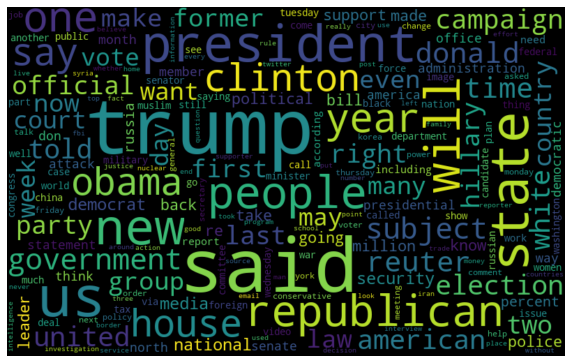

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We will divide the data in to fake and true. 

In [78]:
#Function to generate wordcloud to True news.

def wordcloud_true(text, column_text):
    true_text = text.query("check == 'TRUE'")
    all_words = ' '.join([text for text in true_text[column_text]])

    wordcloud = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [79]:
#Function to generate wordcloud to Fake news.

def wordcloud_fake(text, column_text):
    fake_text = text.query("check == 'FAKE'")
    all_words = ' '.join([text for text in fake_text[column_text]])

    wordcloud = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

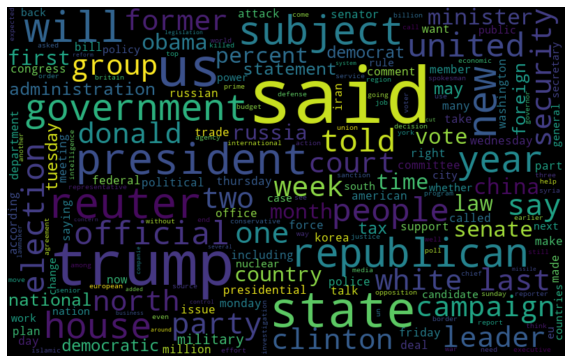

In [80]:
#Wordcloud of the true news.

wordcloud_true(df, "article")

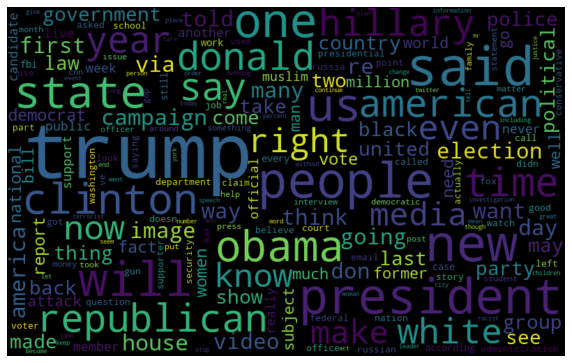

In [81]:
#Wordcloud of the fake news.

wordcloud_fake(df, "article")

Now we will plot the pareto chart to better visualize the frequencies of the words.

In [82]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

In [83]:
import seaborn as sns
import nltk
    
def pareto(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.show()

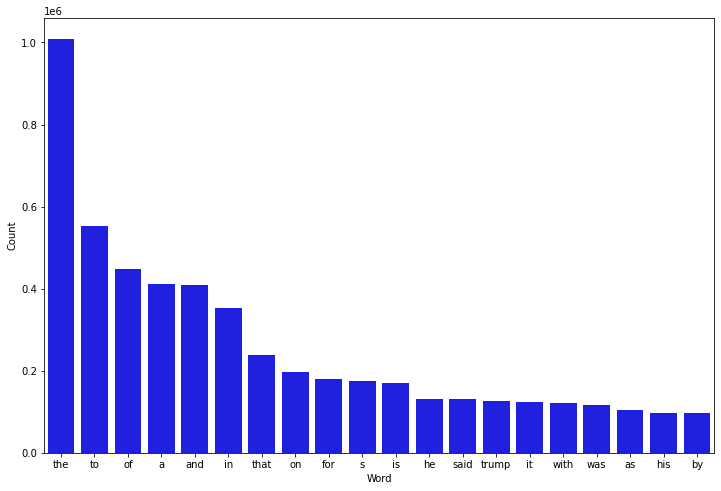

In [84]:
#The 20 more frequent words.

pareto(df, "article", 20)

Lemmatization taking several hours to execute so I decided to comment it.

In [85]:
# #Lemmatization

# from nltk.stem import WordNetLemmatizer 

# lemmatizer = WordNetLemmatizer()

# def lemmatize_text(text):
#     return [lemmatizer.lemmatize(w) for w in df["article"]]

# df['article'] = df["article"].apply(lemmatize_text)

We will create the BOW and the TF-IDF.

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

#Creating the bag of words
bow_article = CountVectorizer().fit(df['article'])

article_vect = bow_article.transform(df['article'])

In [87]:
#TF-IDF

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(article_vect)
news_tfidf = tfidf_transformer.transform(article_vect)
print(news_tfidf.shape)

(44898, 248247)


Now We will train our data using Suport Vector Machine.

In [88]:
#We will use 20% of the data to test the model.

from sklearn.model_selection import train_test_split
X = news_tfidf
y = df['check']


X_train, X_test, Y_train,Y_test= train_test_split(X, y, test_size=0.2)

Support Vector Machine.

In [97]:
from sklearn.linear_model import SGDClassifier

fake_detector_svc = SGDClassifier().fit(X_train, Y_train)

In [98]:
prediction_svc = fake_detector_svc.predict(X_test)

In [99]:
print (classification_report(Y_test, prediction_svc))

              precision    recall  f1-score   support

        FAKE       0.99      0.99      0.99      4728
        TRUE       0.99      0.99      0.99      4252

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

